In [1]:
import numpy as np
import pandas as pd

# 定义样本量和初始次品率假设
n = 100  # 样本量
initial_defect_rates_table1 = [0.10, 0.20, 0.05]  # 表1中的假设次品率
initial_defect_rates_table2 = [0.10, 0.10]  # 表2中的假设次品率


# 根据泊松分布生成新的次品率
def generate_defect_rate(n, p):
    lam = n * p  # 泊松分布的λ参数
    k = np.random.poisson(lam)  # 泊松分布生成次品数量
    defect_rate = k / n  # 计算次品率
    return defect_rate


# 生成表1和表2的次品率
new_defect_rates_table1 = [
    generate_defect_rate(n, p) for p in initial_defect_rates_table1
]
new_defect_rates_table2 = [
    generate_defect_rate(n, p) for p in initial_defect_rates_table2
]

# 表1的数据
table1_data = {
    "情况": [1, 2, 3, 4, 5, 6],
    "零配件1次品率": [generate_defect_rate(n, 0.10) for _ in range(6)],
    "零配件2次品率": [generate_defect_rate(n, 0.20) for _ in range(6)],
    "成品次品率": [generate_defect_rate(n, 0.10) for _ in range(6)],
    "拆解费用": [5, 5, 5, 5, 5, 40],
}

# 表2的数据
table2_data = {
    "零配件": [1, 2, 3, 4, 5],
    "零配件次品率": [generate_defect_rate(n, 0.10) for _ in range(5)],
    "半成品次品率": [generate_defect_rate(n, 0.10) for _ in range(5)],
    "成品次品率": [generate_defect_rate(n, 0.10) for _ in range(5)],
    "拆解费用": [6, 6, 6, 6, 6],
}

# 创建DataFrame
table1_df = pd.DataFrame(table1_data)
table2_df = pd.DataFrame(table2_data)

# 显示表1和表2
table1_df, table2_df

with pd.ExcelWriter("tables.xlsx") as writer:
    table1_df.to_excel(writer, sheet_name="Table1")
    table2_df.to_excel(writer, sheet_name="Table2")

print("DataFrames 已保存到 tables.xlsx 文件中")


DataFrames 已保存到 tables.xlsx 文件中


In [19]:
import numpy as np

# 定义样本量和初始次品率假设
n = 100  # 样本量
initial_defect_rates = [0.10, 0.20, 0.05]  # 假设的初始次品率列表

# 根据泊松分布生成新的次品率
def generate_defect_rate(n, p):
    # λ = n * p，泊松分布的参数
    lam = n * p
    # 生成泊松随机变量 k，表示检测到的次品数量
    k = np.random.poisson(lam)
    # 计算次品率
    defect_rate = k / n
    return defect_rate

# 示例生成新次品率
new_defect_rates = [generate_defect_rate(n, p) for p in initial_defect_rates]

print("新的次品率: ", new_defect_rates)


新的次品率:  [0.12, 0.22, 0.09]


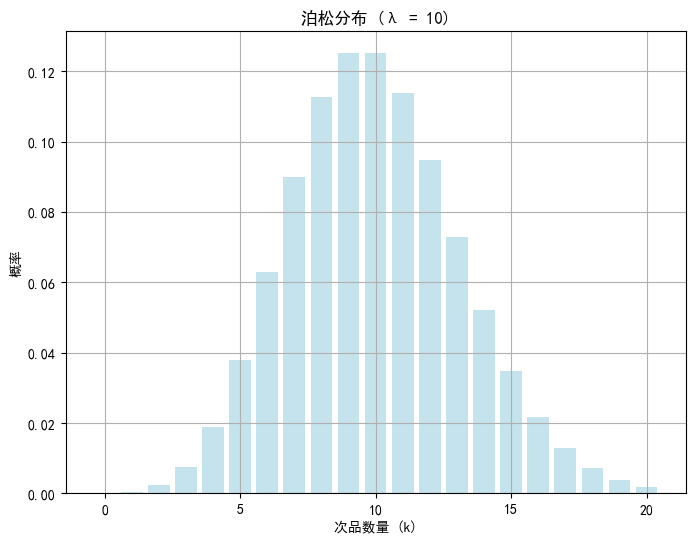

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 泊松分布的参数 λ
lam = 10  # 例如，假设 λ = 10

# 生成泊松分布的范围
x = np.arange(0, 21)
pmf = poisson.pmf(x, lam)

# 创建泊松分布的可视化图
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, color='lightblue', alpha=0.7)
plt.title(f'泊松分布 (λ = {lam})')
plt.xlabel('次品数量 (k)')
plt.ylabel('概率')
plt.grid(True)
plt.show()


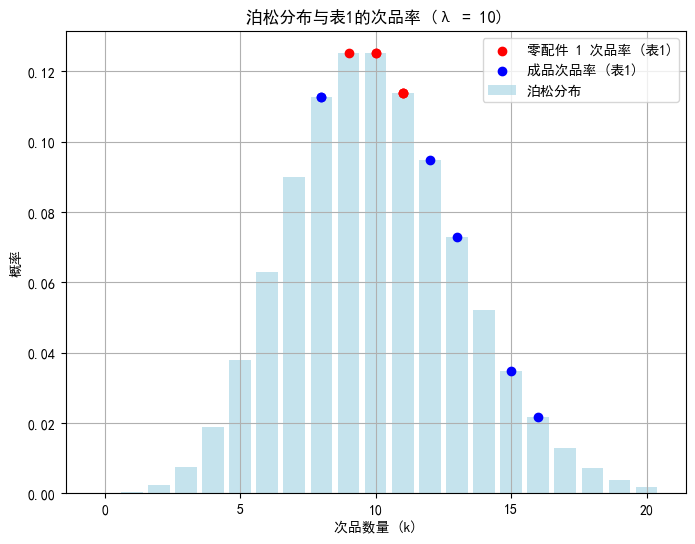

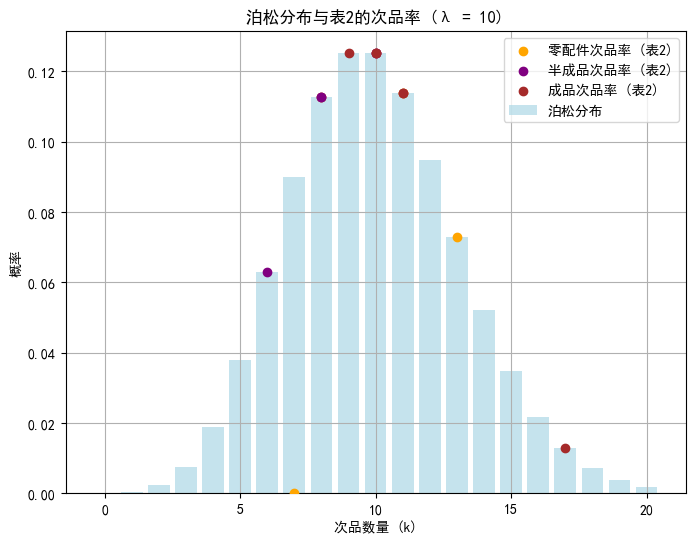

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 泊松分布的参数 λ
lam = 10  # 例如，假设 λ = 10

# 生成泊松分布的范围
x = np.arange(0, 21)
pmf = poisson.pmf(x, lam)

# 表1数据
data_table1 = np.array([
    [0.11, 0.19, 0.13],
    [0.11, 0.19, 0.08],
    [0.10, 0.15, 0.15],
    [0.10, 0.25, 0.08],
    [0.09, 0.18, 0.16],
    [0.11, 0.20, 0.12]
])

# 表2数据
data_table2 = np.array([
    [0.13, 0.10, 0.10],
    [0.10, 0.06, 0.11],
    [0.08, 0.10, 0.09],
    [0.07, 0.08, 0.17],
    [0.11, 0.08, 0.11]
])

# 绘制表1的数据
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, color='lightblue', alpha=0.7, label='泊松分布')

# 计算泊松分布对应的y值（概率）
y_values_table1_p1 = poisson.pmf(data_table1[:, 0] * 100, lam)
y_values_table1_p2 = poisson.pmf(data_table1[:, 1] * 100, lam)
y_values_table1_pc = poisson.pmf(data_table1[:, 2] * 100, lam)

# 添加表1的零配件1、零配件2和成品的次品率
plt.scatter(data_table1[:, 0] * 100, y_values_table1_p1, color='red', label='零配件 1 次品率 (表1)', zorder=5)
#plt.scatter(data_table1[:, 1] * 100, y_values_table1_p2, color='green', label='零配件 2 次品率 (表1)', zorder=5)
plt.scatter(data_table1[:, 2] * 100, y_values_table1_pc, color='blue', label='成品次品率 (表1)', zorder=5)

# 设置图表标签和标题
plt.title(f'泊松分布与表1的次品率 (λ = {lam})')
plt.xlabel('次品数量 (k)')
plt.ylabel('概率')
plt.legend()
plt.grid(True)
plt.show()

# 绘制表2的数据
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, color='lightblue', alpha=0.7, label='泊松分布')

# 计算泊松分布对应的y值（概率）
y_values_table2_p1 = poisson.pmf(data_table2[:, 0] * 100, lam)
y_values_table2_p2 = poisson.pmf(data_table2[:, 1] * 100, lam)
y_values_table2_pc = poisson.pmf(data_table2[:, 2] * 100, lam)

# 添加表2的零配件、半成品和成品的次品率
plt.scatter(data_table2[:, 0] * 100, y_values_table2_p1, color='orange', label='零配件次品率 (表2)', zorder=5)
plt.scatter(data_table2[:, 1] * 100, y_values_table2_p2, color='purple', label='半成品次品率 (表2)', zorder=5)
plt.scatter(data_table2[:, 2] * 100, y_values_table2_pc, color='brown', label='成品次品率 (表2)', zorder=5)

# 设置图表标签和标题
plt.title(f'泊松分布与表2的次品率 (λ = {lam})')
plt.xlabel('次品数量 (k)')
plt.ylabel('概率')
plt.legend()
plt.grid(True)
plt.show()
